In [2]:
# Jairo Andres Saavedra Alfonso
# 01 de Febrero de 2019
# Universidad de Los Andes
# Phycis 
######################__________________Report 01__________________######################

In [3]:
#Packages
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from astropy.table import Table

In [4]:
# Reading data from truth_DR12Q.fits. This file have the database sample of spectra with human-expert classifitacion 
hdul = fits.open('Superset_DR12Q.fits') # Open file
info=hdul.info() # File info
columns=hdul[1].columns # File Columns 
print(info,'/n',columns)
data=hdul[1].data # Database of spectra with human-expert classifications 

Filename: Superset_DR12Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (3111,)   uint8   
  1  Superset_DR12Q_v2_6.fits    1 BinTableHDU    104   546856R x 23C   [18A, D, D, J, J, J, J, D, E, E, J, J, J, I, K, K, K, K, 5E, 5E, 5E, 5E, 5E]   
None /n ColDefs(
    name = 'SDSS_NAME'; format = '18A'; unit = '-'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'THING_ID'; format = 'J'; unit = '-'
    name = 'PLATE'; format = 'J'; unit = '-'
    name = 'MJD'; format = 'J'; unit = '-'
    name = 'FIBERID'; format = 'J'; unit = '-'
    name = 'Z_VI'; format = 'D'; unit = '-'
    name = 'Z_PIPE'; format = 'E'; unit = '-'
    name = 'ERR_ZPIPE'; format = 'E'; unit = '-'
    name = 'ZWARNING'; format = 'J'; unit = '-'
    name = 'CLASS_PERSON'; format = 'J'; unit = '-'
    name = 'Z_CONF_PERSON'; format = 'J'; unit = '-'
    name = 'SDSS_MORPHO'; format = 'I'; unit = '-'
    name = '

In [5]:
# The column 'CLASS_PERSON' have a class identifier for each spectrum: STARS=1, GALAXY=4, QSO=3 and QSO_BAL=30.
C_P=data['CLASS_PERSON'] #Class Person column 
STAR=C_P[C_P==1] # objects classified as stars
GALAXY=C_P[C_P==4] # objects classified as galaxies 
QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
N_C=C_P[C_P!=30]   
N_C=N_C[N_C!=3]
N_C=N_C[N_C!=1]
N_C=N_C[N_C!=4] # objects wrong classified
print(STAR.shape)
print(GALAXY.shape)
print(QSO.shape)
print(QSO_BAL.shape)
print(N_C.shape)

(207915,)
(22795,)
(270686,)
(29659,)
(15801,)


In [31]:
Z_VI=data['Z_VI'] # Redshift of each object
print(Z_VI[Z_VI==0.0].shape)
Z_C_P=data['Z_CONF_PERSON']
print(Z_C_P[Z_C_P==0].shape)
T_ID=data['THING_ID']
i=T_ID==-1
T_ID=T_ID[i]

(214791,)
(7123,)


Text(0.5,1,'QSO')

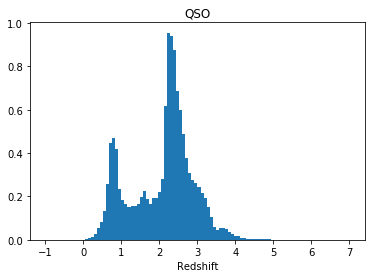

In [53]:
ii=C_P==3
oo=C_P==30
Z_VI_QSO=Z_VI[ii]
Z_VI_QSO_BAL=Z_VI[oo]
plt.hist(Z_VI_QSO,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO')


Text(0.5,1,'QSO_BAL')

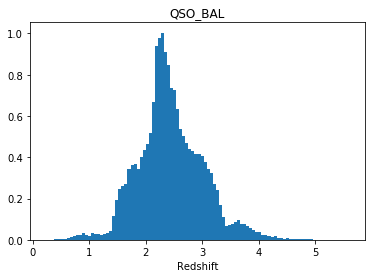

In [55]:
plt.hist(Z_VI_QSO_BAL,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO_BAL')

Filename: data_dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (886, 639464)   float64   
  1                1 BinTableHDU     16   639464R x 4C   [J, J, J, J]   
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f311eb40e48>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f311ead9c18>] /n ColDefs(
    name = 'TARGETID'; format = 'J'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
)


(443, 886)

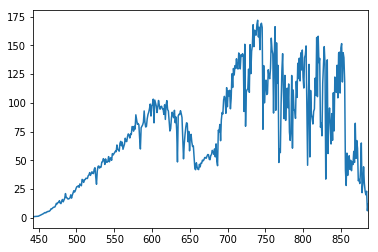

In [43]:
hdul_2 = fits.open('data_dr12.fits')
info=hdul_2.info() # File info
columns=hdul_2[1].columns # File Columns 
print(hdul,'/n',columns)
data=hdul[1].data # Database of spectra
spectrum=hdul_2[0].data # Spectrum of each object 
x=np.linspace(0,886,886)
plt.plot(x,spectrum[0])
plt.xlim([443,886])
#[plt.plot(x,spectrum[i]) for i in range(600)]
#plt.show()